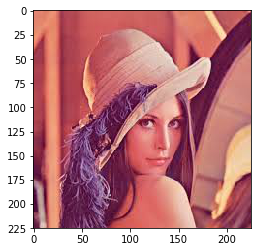

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import Histogram, Threshold
from PIL import Image


img = Image.open("./res/lena.jpg").convert("RGB")
img = np.asarray(img)

plt.imshow(img)

In [14]:
def gaussian_kernel(k_size, sigma):
    """
    param
    k_size : Gaussian kernel size
    sigma : gaussian kernel standard variance
    
    return
    filter = k_size * k_size gaussian filter
    """
    size = k_size//2
    y, x = np.ogrid[-size:size+1, -size:size+1]
    #ref : https://en.wikipedia.org/wiki/Gaussian_filter
    filter = 1/(2*np.pi * (sigma**2)) * np.exp(-1 *(x**2 + y**2) /(2*(sigma**2)))
    sum = filter.sum()
    filter /= sum
    return filter

In [27]:
def padding(img, k_size):
    """
    param
    img : padding img
    k_size : kernel size
    
    return 
    res : padded img
    """
    pad_size = k_size//2
    rows, cols, ch = img.shape
    
    res = np.zeros((rows + (2*pad_size), cols+(2*pad_size), ch), dtype=np.float)
    
    if pad_size == 0:
        res = img.copy()
    else:
        res[pad_size:-pad_size, pad_size:-pad_size] = img.copy()
    return res
    

In [39]:
def gaussian_filtering(img, k_size=3,sigma=1):
    """
    param
    img : input img
    k_size : kernel size
    sigma : standard deviation
    
    return
    filtered_img : gaussian filtered image returned
    """
    rows, cols, channels = img.shape
    filter = gaussian_kernel(k_size, sigma)
    pad_img = padding(img,k_size)
    filtered_img = np.zeros((rows, cols, channels), dtype=np.float32)
    
    for ch in range(0, channels):
        for i in range(rows):
            for j in range(cols):
                filtered_img[i, j, ch] = np.sum(filter * pad_img[i:i+k_size, j:j+k_size, ch])

    return filtered_img.astype(np.uint8)

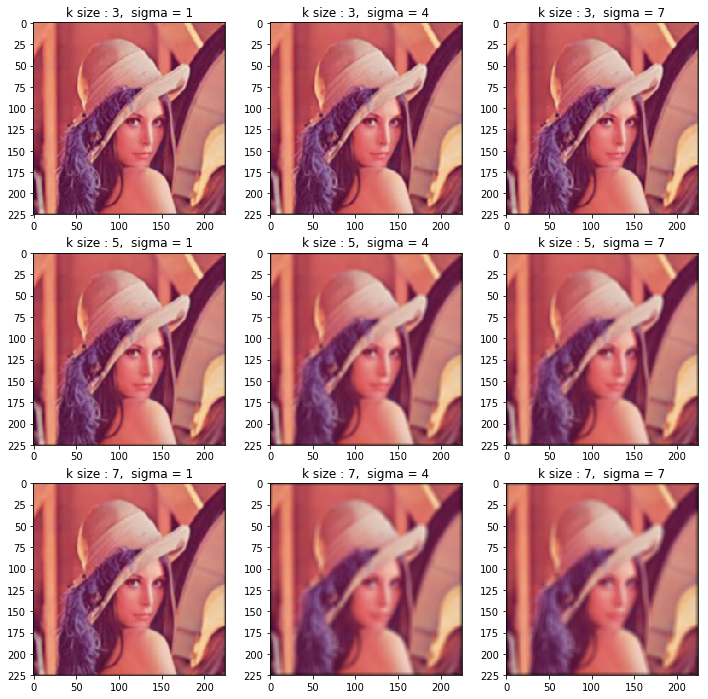

In [61]:
plt.figure(figsize=(12,12))
row = 3
col = 3

for i in range(0, 3):
    for j in range(0,3):
        plt.subplot(3, 3, 1+ i*3 + j)
        k_size = 3+2*i
        sigma = 3*j + 1
        res = gaussian_filtering(img, k_size = k_size, sigma = sigma)
        title = "k size : " + str(k_size) + ",  sigma = " + str(sigma)
        plt.title(title)
        plt.imshow(res)